## TEXT MINING

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Preprocessing Part 1

1. Lowercase
1. Remove contraction
1. Remove number
1. Remove punctuation
1. Remove stopwords
1. Romove whitespace

In [3]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# label
# 0: positive or neutral
# 1: negative

df['label'] = np.where(df['airline_sentiment']=='negative', 1, 0)
df = df[['text', 'airline_sentiment', 'label']]
df

,text,airline_sentiment,label
0,@VirginAmerica What @dhepburn said.,neutral,0
1,@VirginAmerica plus you've added commercials t...,positive,0
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0
3,@VirginAmerica it's really aggressive to blast...,negative,1
4,@VirginAmerica and it's a really big bad thing...,negative,1
...,...,...,...
14635,@AmericanAir thank you we got on a different f...,positive,0
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,1
14637,@AmericanAir Please bring American Airlines to...,neutral,0
14638,"@AmericanAir you have my money, you change my ...",negative,1


## Question
- Lakukan preprocessing pada dataset diatas secara lengkap
- Lakukan beberapa visualisasi dari hasil preprocessing text dan coba dapatkan insight dari visualisasi tersebut
- Lakukan model benchmarking untuk algoritma LogisticRegression, XGBoost, dan RandomForest dan dapatkan algortima terbaik
- Lakukan juga tehnik resampling untuk dataset tersebut
- Lakukan juga hyperparameter tuning untuk model tersebut

In [5]:
df['label'].value_counts()

# 0: positive or neutral
# 1: negative

label
1    9178
0    5462
Name: count, dtype: int64

### 0. Hapus mention

In [6]:
def remove_mention(text):
    hasil = ' '.join([kata for kata in text.split() if not kata.__contains__('@')])
    return hasil

### 1. Lowercase

In [7]:
def to_lower(text):
    return text.lower()

### 2. Remove contraction

In [8]:
contractions_dict = {    
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i had",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [9]:
def remove_contraction(text):

    list_kata = text.split()
    list_hasil = []

    for kata in list_kata:

        if kata in contractions_dict.keys():
            list_hasil.append(contractions_dict[kata])
        else:
            list_hasil.append(kata)

    hasil = ' '.join(list_hasil)
    return hasil 

### 3. Remove number

In [10]:
def remove_number(text):
    hasil = ''.join([char for char in text if not char.isnumeric()])
    return hasil

### 4. Remove punctuation

In [11]:
from string import punctuation

In [12]:
def remove_punctuation(text):
    hasil = ''.join([char for char in text if not char in punctuation])
    return hasil

### 5. Remove stopwords

In [13]:
# pip install nltk

In [14]:
import nltk
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')
nltk.download('punkt') 

[nltk_data] Downloading package stopwords to C:\Users\ragil hadi
[nltk_data]     prasetyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ragil hadi
[nltk_data]     prasetyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [17]:
def remove_stopwords(text):
    hasil = ' '.join([kata for kata in text.split() if kata not in stop_words])
    return hasil 

### 6. Remove whitespace

In [18]:
def remove_whitespace(text):
    hasil = ' '.join(text.split())
    return hasil

### Combine all steps

In [19]:
df['text-prep'] = df['text'].apply(remove_mention)
df['text-prep'] = df['text-prep'].apply(to_lower)
df['text-prep'] = df['text-prep'].apply(remove_contraction)
df['text-prep'] = df['text-prep'].apply(remove_number)
df['text-prep'] = df['text-prep'].apply(remove_punctuation)
df['text-prep'] = df['text-prep'].apply(remove_stopwords)
df['text-prep'] = df['text-prep'].apply(remove_whitespace)

df.head()

,text,airline_sentiment,label,text-prep
0,@VirginAmerica What @dhepburn said.,neutral,0,said
1,@VirginAmerica plus you've added commercials t...,positive,0,plus added commercials experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,not today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,1,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,1,really big bad thing


## Preprocessing Part 2

Mengubah kata menjadi kata dasar.

Pilihan:
- Stemming
- Lemmatization

In [20]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer 

### Stemming

In [21]:
stemmer = SnowballStemmer('english')

In [22]:
def stem(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(stemmer.stem(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

## Lemmatization

In [23]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ragil hadi
[nltk_data]     prasetyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
def lemmatize(text):

    list_hasil = []

    for sentence in nltk.sent_tokenize(text):   # pecah paragraf menjadi kalimat-kalimat
        for word in nltk.word_tokenize(sentence): # pecah kalimat menjadi kata-kata
            list_hasil.append(lemmatizer.lemmatize(word))   # ubah kata ke kata dasarnya

    hasil = ' '.join(list_hasil)
    return hasil 

---
## Combine Preprocessing Part 1 & Part 2

In [26]:
df['text-prep-stem'] = df['text-prep'].apply(stem)
df['text-prep-lemm'] = df['text-prep'].apply(lemmatize)

df.head()

,text,airline_sentiment,label,text-prep,text-prep-stem,text-prep-lemm
0,@VirginAmerica What @dhepburn said.,neutral,0,said,said,said
1,@VirginAmerica plus you've added commercials t...,positive,0,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,not today must mean need take another trip,not today must mean need take anoth trip,not today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,negative,1,really aggressive blast obnoxious entertainmen...,realli aggress blast obnoxi entertain guest fa...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,negative,1,really big bad thing,realli big bad thing,really big bad thing


## EDA (Text Exploration)

### 1. Word Frequency

In [27]:
df['text-prep-lemm']

0                                                     said
1                   plus added commercial experience tacky
2               not today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight warning communicati...
14637             please bring american airline blackberry
14638    money change flight not answer phone suggestio...
14639    ppl need know many seat next flight plz put u ...
Name: text-prep-lemm, Length: 14640, dtype: object

In [31]:
def word_freq(text):

    df_text = text.str.extractall('(\w+)') # ambil tiap kata dari tiap document
    df_text = df_text.reset_index()

    df_unique = df_text[0].value_counts()
    df_unique = df_unique.to_frame().reset_index().rename(columns={'index':'word', 0:'freq'})

    return df_unique

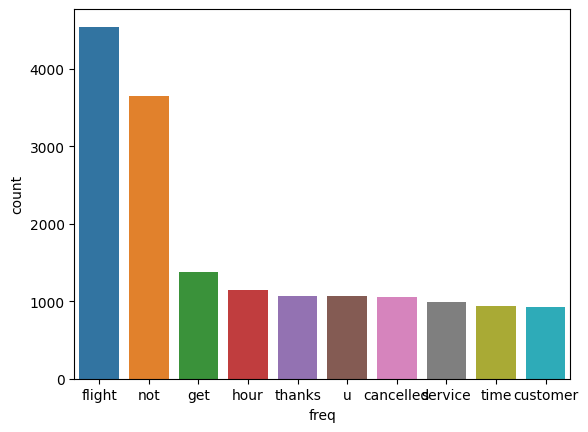

In [32]:
# Top 10 most frequent words
data = word_freq(df['text-prep-lemm'])
sns.barplot(data=data.head(10), x='freq', y='count');

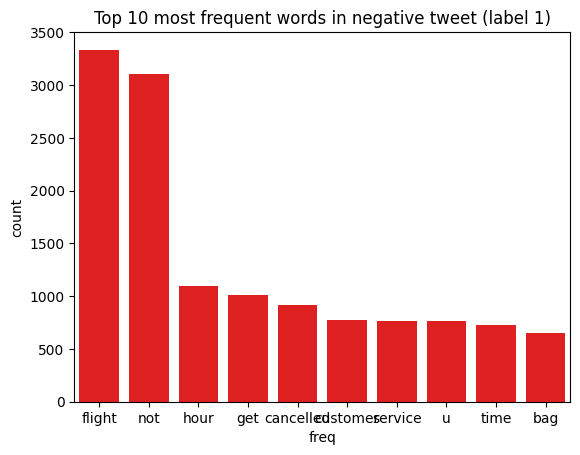

In [33]:
# Top 10 most frequent words in negative tweet (1) 
data = word_freq(df[df['label']==1]['text-prep-lemm'])

sns.barplot(data=data.head(10), x='freq', y='count', color='red')
plt.title('Top 10 most frequent words in negative tweet (label 1)'); 

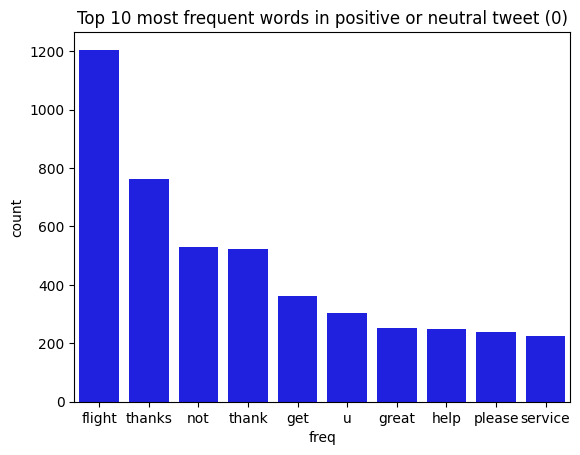

In [34]:
# Top 10 most frequent words in positive or neutral tweet (0)
data = word_freq(df[df['label']==0]['text-prep-lemm'])

sns.barplot(data=data.head(10), x='freq', y='count', color='blue')
plt.title('Top 10 most frequent words in positive or neutral tweet (0)'); 

Summary:

- Pada tweet negative banyak muncul kata: hour, cancelled, customer, service, time, bag
    - Kemungkinan keyword 'hour', 'time' ini berkaitan dengan keterlambatan pesawat
    - Kemungkinan keyword 'customer', 'service' ini berkaitan dengan pelayanan customer service yang tidak memuaskan
    - Kemungkinan keyword 'cancelled' ini berkaitan dengan pembatalan penerbangan pesawat
<br>
<br>
- Pada tweet neutral atau positive banyak muncul kata: thanks, great, help, please, service
    - Kemungkinan keyword 'thanks', 'great',  ini berkaitan dengan pujian terhadap pelayanan dari maskapai
    - Kemungkinan keyword 'help', 'please', 'service' ini berkaitan dengan pertanyaan atau minta tolong 



### 2. Length of Document

In [35]:
df['len_char'] = df['text-prep-lemm'].str.len()
df.head()

,text,airline_sentiment,label,text-prep,text-prep-stem,text-prep-lemm,len_char
0,@VirginAmerica What @dhepburn said.,neutral,0,said,said,said,4
1,@VirginAmerica plus you've added commercials t...,positive,0,plus added commercials experience tacky,plus ad commerci experi tacki,plus added commercial experience tacky,38
2,@VirginAmerica I didn't today... Must mean I n...,neutral,0,not today must mean need take another trip,not today must mean need take anoth trip,not today must mean need take another trip,42
3,@VirginAmerica it's really aggressive to blast...,negative,1,really aggressive blast obnoxious entertainmen...,realli aggress blast obnoxi entertain guest fa...,really aggressive blast obnoxious entertainmen...,78
4,@VirginAmerica and it's a really big bad thing...,negative,1,really big bad thing,realli big bad thing,really big bad thing,20


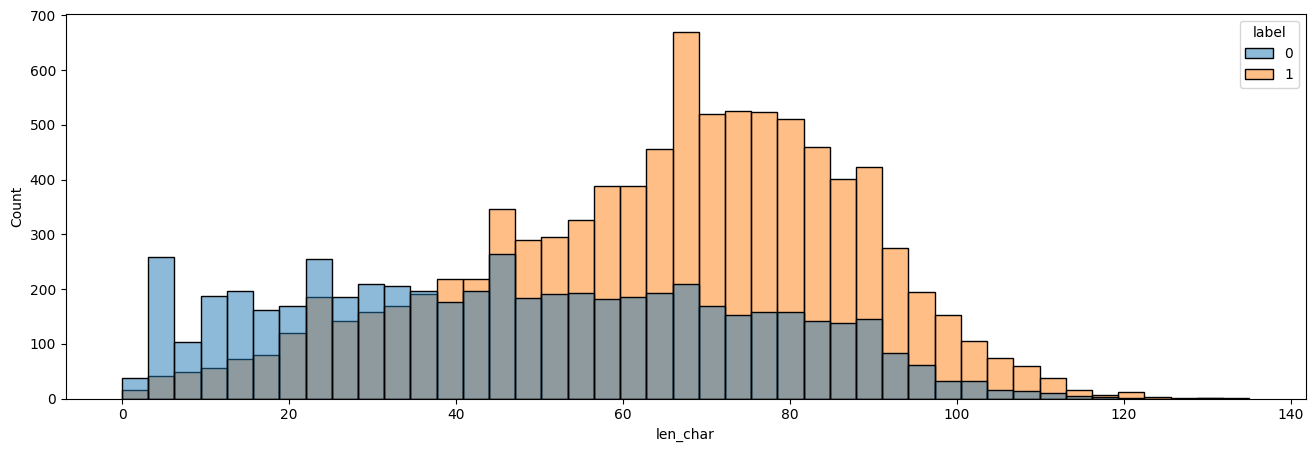

In [36]:
plt.figure(figsize=(16,5))
sns.histplot(data=df, x='len_char', hue='label');

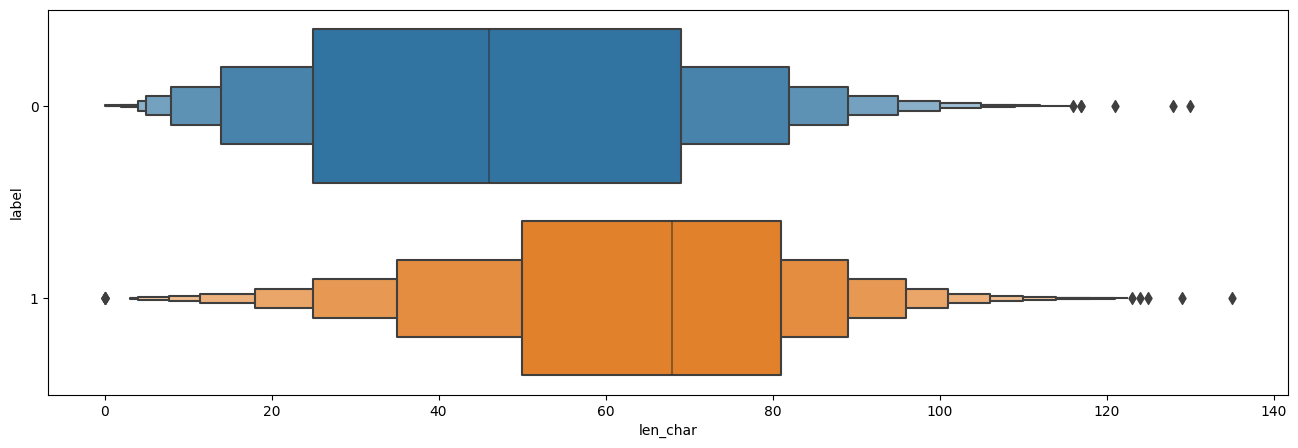

In [37]:
df['label'] = df['label'].astype(str)

plt.figure(figsize=(16,5))
sns.boxenplot(data=df, x='len_char', y='label');

In [38]:
df['label'] = df['label'].astype(int)

Summary:
- Ada kecenderungan tweet dengan sentimen negatif lebih panjang jumlah karakternya

---

## Classification

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix

### Clean Dataset 

In [40]:
df_clean = df[['text-prep-lemm', 'airline_sentiment', 'label']]
df_clean.head()

,text-prep-lemm,airline_sentiment,label
0,said,neutral,0
1,plus added commercial experience tacky,positive,0
2,not today must mean need take another trip,neutral,0
3,really aggressive blast obnoxious entertainmen...,negative,1
4,really big bad thing,negative,1


### Define text and y

In [41]:
text = df_clean['text-prep-lemm']
y = df_clean['label']

In [42]:
y.value_counts() / len(y)

label
1    0.626913
0    0.373087
Name: count, dtype: float64

### Data Splitting

In [43]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=0.25, stratify=y, random_state=42)

### Benchmark Model

In [44]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

logreg = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state = 42)
rf = RandomForestClassifier(random_state=42)
smote = SMOTE(random_state=42)

vectorizer = TfidfVectorizer(norm=None)

list_model = [logreg, rf, xgb]

fit_time_arr = []
score_time_arr = []     
test_accuracy_arr = []    
test_precision_arr = []
test_recall_arr = []
test_f1_arr = []

metrics = {'balanced_accuracy': 'balanced_accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

for i in list_model:
    crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('vectorizer', vectorizer),
        ('resample', smote),
        ('model', i),
    ])

    scores = cross_validate(estimator, text_train, y_train,cv=crossval, scoring=metrics)
    fit_time_arr.append(scores['fit_time'].mean())
    score_time_arr.append(scores['score_time'].mean())
    test_accuracy_arr.append(scores['test_balanced_accuracy'].mean())
    test_precision_arr.append(scores['test_precision'].mean())
    test_recall_arr.append(scores['test_recall'].mean())
    test_f1_arr.append(scores['test_f1'].mean())

model_bench = pd.DataFrame({
    'model': ['logreg', 'rf', 'xgboost'],
    'fit_time': fit_time_arr,
    'score_time': score_time_arr,
    'accuracy': test_accuracy_arr,
    'precision': test_precision_arr,
    'recall': test_recall_arr,
    'f1': test_f1_arr,
})

model_bench

,model,fit_time,score_time,accuracy,precision,recall,f1
0,logreg,1.128987,0.058223,0.786764,0.850087,0.815224,0.832264
1,rf,26.718713,0.165551,0.782221,0.821089,0.890616,0.854429
2,xgboost,0.748689,0.046785,0.794070,0.854481,0.824229,0.839048


## Hyperparameter Tuning

In [45]:
vectorizer1 = CountVectorizer(ngram_range=(1,1))
vectorizer2 = TfidfVectorizer(norm=None)

In [46]:
# hyperparam space Decision Tree
xgb = XGBClassifier(random_state = 42)
smote = SMOTE(random_state=42)

hyperparam_space = {
    'model__learning_rate': [0.01, 0.1, 1, 0.001],
    'model__min_samples_split': range(2,50,2),
    'model__subsample': [0.6, 0.8, 1.0],
    'model__n_estimators': range(2,50,2),
    'vectorizer': [vectorizer1, vectorizer2],
    'vectorizer__ngram_range': [(1,1), (1,2)],
}

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer1),
    ('resampler', smote),
    ('model', xgb)
])

# randomized search
random_search = RandomizedSearchCV(
    estimator= model_pipe,
    param_distributions= hyperparam_space,
    scoring='recall',
    cv=5,
    random_state=0,
    n_jobs=-1,
    n_iter= 50
)

In [47]:
# fit
random_search.fit(text_train, y_train)

[14:03:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                             ('resampler',
                                              SMOTE(random_state=42)),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            feature_types=None,
                                                            gamma=No...
                                                            random_state=42, ...))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__learning_rate': [0.01, 0.1, 1,
                                                                 0.001],
                                        'model__min_samples_split': range(2, 50, 2),
                                        'model__n_estimators': range(2, 50, 2),
                                        'model__subsample': [0.6, 0.8, 1.0],
                                        'vectorizer': [CountVectorizer(),
                                                       TfidfVectorizer(norm=None)],
                                        'vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]},
                   random_state=0, scoring='recall')

In [48]:
random_search.best_params_

{'vectorizer__ngram_range': (1, 1),
 'vectorizer': TfidfVectorizer(norm=None),
 'model__subsample': 1.0,
 'model__n_estimators': 48,
 'model__min_samples_split': 32,
 'model__learning_rate': 1}

In [49]:
random_search.best_score_

0.832945208660553

## Predict to Test Set

Before Tuning

In [50]:
from sklearn.metrics import precision_score

xgb = XGBClassifier(random_state = 42)
vectorizer = TfidfVectorizer(norm=None)
resampler = SMOTE(random_state=42)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('resampler', resampler),
    ('model', xgb)
])

model_pipe.fit(text_train, y_train)
y_pred_before = model_pipe.predict(text_test)
precision_score(y_test, y_pred_before)

0.8738738738738738

After Tuning

In [51]:
random_search.best_estimator_

Pipeline(steps=[('vectorizer', TfidfVectorizer(norm=None)),
                ('resampler', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, min_samples_split=32,
                               missing=nan, monotone_constraints=None,
                               n_estimators=48, n_jobs=None,
                               num_parallel_tree=None, predictor=None, ...))])

In [52]:
best_model = random_search.best_estimator_
best_model.fit(text_train, y_train)
y_pred_after = best_model.predict(text_test)


precision_score(y_test, y_pred_after)

[14:03:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



0.8629893238434164

Text(0.5, 1.0, 'After Tuning')

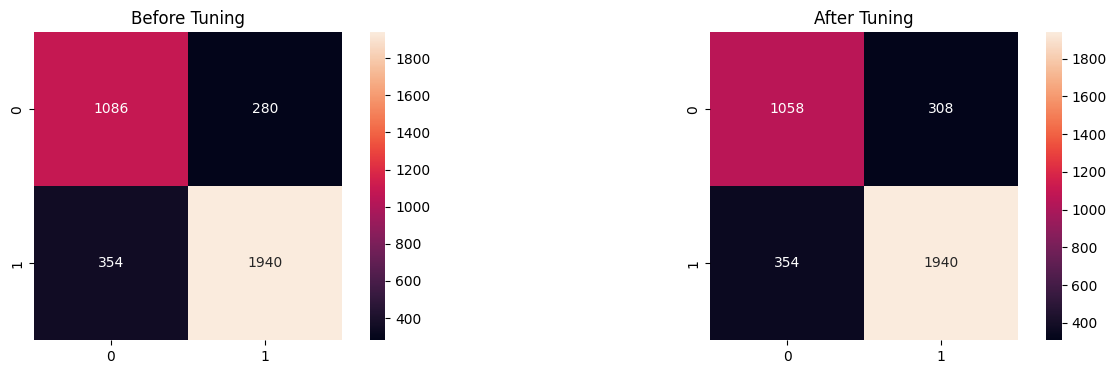

In [53]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_before), annot=True, fmt='.0f', square=True)
plt.title('Before Tuning')

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='.0f', square=True)
plt.title('After Tuning')


In [54]:
# Performa model meningkat setelah dilakukan hyperpameter tuning

print(precision_score(y_test, y_pred_before), 'Before hyperpameter tuning')
print(precision_score(y_test, y_pred_after), 'After hyperpameter tuning')

0.8738738738738738 Before hyperpameter tuning
0.8629893238434164 After hyperpameter tuning


### Kesimpulan

- FP: kita prediksi tweet bersentimen negatif (contoh: tweet complain), padahal aktualnya bersentimen positif/netral (contoh: tweet apresiasi)
- FN: kita prediksi tweet bersentimen positif/netral (contoh: tweet apresiasi), padahal aktualnya bersentimen negatif (contoh: tweet complain)

FN lebih berbahaya dari pada FP. Karena jika kita memprediksi sebuah tweet sebagai tweet yg bersentimen positif/netral (contoh: tweet apresiasi),
maka kita tidak menjadikan tweet tersebut sebagai prioritas untuk direspon, padahal tweet tetsebut bersentimen negatif. Efeknya user akan mengaggap
maskapai kita punya service yang buruk.

Jadi kita bisa mengubah metric yang digunakan menjadi Recall atau f2 score, agar jumlah FN bisa lebih ditekan/dikurangi lagi.

In [55]:
import pickle
xgb = XGBClassifier(random_state = 42)
vectorizer = TfidfVectorizer(norm=None)
resampler = SMOTE(random_state=42)

# pipeline
model_pipe = Pipeline([ 
    ('vectorizer', vectorizer),
    ('resampler', resampler),
    ('model', xgb)
])

model_pipe.fit(text_train, y_train)
model_pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(norm=None)),
                ('resampler', SMOTE(random_state=42)),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

In [56]:
pickle.dump(model_pipe, open('model/model.sav', 'wb'))